In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import librosa
import csv
import os

In [16]:
CREATE_CSV_FILES = True

# Defines the names of the CSV files
TRAIN_CSV_FILE = "train.csv"
TEST_CSV_FILE = "test.csv"

Snoring_CSV = "Snoring.csv"
Non_Snoring_CSV = "Non_Snoring.csv"

Data_CSV_2 = 'Data_2.csv'


In [8]:
def extractWavFeatures(soundFilesFolder, csvFileName):
    print("The features of the files in the folder "+soundFilesFolder+" will be saved to "+csvFileName)
    header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate spectogram'  
    for i in range(1, 21):
        header += f' mfcc{i}'
    header += ' label'
    header = header.split()
    print('CSV Header: ', header)
    file = open(csvFileName, 'w', newline='')
    #with file:
    writer = csv.writer(file)
    writer.writerow(header)
    genres = '1 2 3 4 5 6 7 8 9 0'.split()
    for filename in os.listdir(soundFilesFolder):
        number = f'{soundFilesFolder}/{filename}'
        y, sr = librosa.load(number, mono=True, duration=3)
        # remove leading and trailing silence
        y, index = librosa.effects.trim(y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        spectogram = librosa.feature.melspectrogram(y)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)} {np.mean(spectogram)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        writer.writerow(to_append.split())
    file.close()
    print("End of extractWavFeatures")


In [9]:
file = "Snoring Dataset/1/190902_367_st12_Snoring_1911_1.wav"
y, sr = librosa.load(file, mono = True)

file = "Data/Non_Snoring/190725_327_st12_Silent_7_2.wav"
x, sr = librosa.load(file, mono = True)

In [10]:
chroma_stft = librosa.feature.melspectrogram(y)
chroma_stft = librosa.amplitude_to_db(chroma_stft)

<ipython-input-10-c301e947fa02>:1: FutureWarning: Pass y=[-0.01244792 -0.01887449 -0.01585314 ... -0.00472919 -0.00618314
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma_stft = librosa.feature.melspectrogram(y)


In [11]:
a = librosa.core.stft(y, hop_length= 512, n_fft= 2048)
b = np.abs(a)
c = librosa.amplitude_to_db(b)

In [12]:
import librosa.display

In [13]:
np.mean(b)

0.055375732

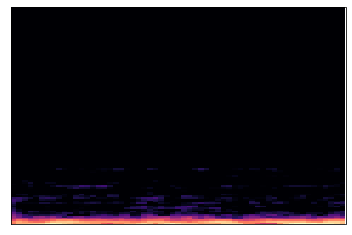

In [14]:
librosa.display.specshow(chroma_stft)

In [17]:
if (CREATE_CSV_FILES == True):
    extractWavFeatures("Dataset/Snoring", Data_CSV_2)
    print("CSV files are created")
    


The features of the files in the folder Dataset/Snoring will be saved to Data_2.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'spectogram', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


<ipython-input-8-f2d523ac18f7>:26: FutureWarning: Pass y=[ 0.00328224  0.00204584 -0.00962322 ... -0.00128507 -0.00076117
 -0.00093584] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectogram = librosa.feature.melspectrogram(y)
<ipython-input-8-f2d523ac18f7>:26: FutureWarning: Pass y=[-0.17541082 -0.2597296  -0.2136232  ...  0.00735026 -0.0016001
 -0.01475391] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectogram = librosa.feature.melspectrogram(y)
<ipython-input-8-f2d523ac18f7>:26: FutureWarning: Pass y=[0.00214666 0.00590859 0.00828887 ... 0.00991711 0.00454599 0.0016732 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectogram = librosa.feature.melspectrogram(y)
<ipython-input-8-f2d523ac18f7>:26: FutureWarning: Pass y=[0.00133418 0.00244187 0.00220113 ... 0.0078836  0.00775638 0.01188341] as keyword args. From version 0.1

End of extractWavFeatures
CSV files are created


<ipython-input-8-f2d523ac18f7>:26: FutureWarning: Pass y=[-0.10525998 -0.17371614 -0.13697277 ...  0.01415316  0.03245429
  0.04166644] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectogram = librosa.feature.melspectrogram(y)
<ipython-input-8-f2d523ac18f7>:26: FutureWarning: Pass y=[-0.05909797 -0.06802896  0.03419228 ...  0.05184779  0.04111732
  0.04264416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectogram = librosa.feature.melspectrogram(y)
<ipython-input-8-f2d523ac18f7>:26: FutureWarning: Pass y=[-0.01466364 -0.00656966  0.01331316 ... -0.0312988  -0.02158993
 -0.01484082] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectogram = librosa.feature.melspectrogram(y)
